In [2]:
%cd /content/drive/MyDrive/"Colab Notebooks"/MCUT/R911R912
!pwd
!ls

/content/drive/MyDrive/Colab Notebooks/MCUT/R911R912
/content/drive/MyDrive/Colab Notebooks/MCUT/R911R912
'ARO1_不可控_Feature Selection.ipynb'  'ARO2_可控_Feature Selection.ipynb'
 ARO1_不可控_Xgboost.ipynb	        ARO2_可控_Xgboost.ipynb
'ARO1_可控_Feature Selection.ipynb'    'R911R912 _ARO1_R2.xlsx'
 ARO1_可控_Xgboost.ipynb	        R911R912.pptx
'ARO2_不可控_Feature Selection.ipynb'  'R911R912 _明志蔡教授_R2.xlsx'


In [3]:
import pandas as pd
path = "R911R912 _ARO1_R2.xlsx"
xls = pd.ExcelFile(path)
sheets = xls.sheet_names
display(sheets)

['R911R912_TAG清單',
 'R911R912_TAG相關錶點資料(X)',
 '目標值(Y)相關錶點資料',
 'R911R912_TAG相關錶點資料(停用)']

In [4]:
df = xls.parse(sheets[1])
df.columns.values[2] = "time"
df = df.iloc[:,2:]
for i in df.columns[1:]:
  df[i] = pd.to_numeric(df[i],errors='coerce')

df

time  ...  ARO1-LIMS-S909-BR_INDEX
0      638.648  ...                      NaN
1      651.542  ...                      NaN
2      648.831  ...                      NaN
3      622.012  ...                      NaN
4      671.924  ...                      NaN
...        ...  ...                      ...
71443  722.191  ...                      NaN
71444  718.417  ...                      NaN
71445  718.555  ...                      NaN
71446  718.663  ...                      NaN
71447  717.995  ...                      NaN

[71448 rows x 63 columns]

In [5]:
df.columns

Index(['time', 'ARO1-DCS-FIC_91103_1', 'ARO1-DCS-FI_91203',
       'ARO1-DCS-FIC_98102_1', 'ARO1-DCS-FIC_98102_1.RESULT',
       'ARO1-DCS-FIC_98302_1', 'ARO1-DCS-FIC_98302_1.RESULT',
       'ARO1-DCS-FIC_98401_1', 'ARO1-DCS-FIC_98401_1.RESULT',
       'ARO1-DCS-FIC_98403_1', 'ARO1-DCS-FIC_98403_1.RESULT',
       'ARO1-DCS-FI_91701', 'ARO1-DCS-FIC_92001_1',
       'ARO1-DCS-FIC_92001_1.RESULT', 'ARO1-DCS-FIC_91101_2',
       'ARO1-DCS-FIC_91102_2', 'ARO1-DCS-FIC_91105_2', 'ARO1-DCS-FIC_91106_2',
       'ARO1-DCS-FIC_91201_2', 'ARO1-DCS-FIC_91202_2', 'ARO1-DCS-FIC_91204_2',
       'ARO1-DCS-FIC_91205_2', 'ARO1-DCS-FIC_98103_2', 'ARO1-DCS-FI_98104',
       'ARO1-DCS-PI99801', 'ARO1-DCS-PDI98301A', 'ARO1-DCS-PDI98301',
       'ARO1-DCS-PDI98401A', 'ARO1-DCS-PDI98401', 'ARO1-DCS-PIC_91103_2',
       'ARO1-DCS-PIC_91203_2', 'ARO1-DCS-PIC_98104', 'ARO1-DCS-AC_A_FA',
       'ARO1-DCS-AC_HF', 'ARO1-DCS-AC_L2_A', 'ARO1-DCS-AC_L3_A',
       'ARO1-DCS-AC_L4_A', 'ARO1-DCS-AC_XF', 'ARO1-DCS-AC_CTIM

In [6]:
df_1 = xls.parse(sheets[2])
df_1 = df_1.iloc[:,1:]
for i in df_1.columns[1:]:
  df_1[i] = pd.to_numeric(df_1[i],errors='coerce')

df_1

ARO1-LIMS-s704-744-p-Xylene  ...  ARO1-LIMS-s916-744-p-Xylene
0                              NaN  ...                          NaN
1                              NaN  ...                          NaN
2                              NaN  ...                          NaN
3                              NaN  ...                          NaN
4                              NaN  ...                          NaN
...                            ...  ...                          ...
71443                          NaN  ...                          NaN
71444                          NaN  ...                          NaN
71445                          NaN  ...                          NaN
71446                          NaN  ...                          NaN
71447                      23.5889  ...                          NaN

[71448 rows x 8 columns]

In [7]:
x_col = ["ARO1-DCS-FIC_98302_1", "ARO1-DCS-FIC_98401_1", "ARO1-DCS-AC_CTIME",
     "ARO1-DCS-AC_STIME", "ARO1-LIMS-S704-BR_INDEX", "ARO1-LIMS-s704-744-C9",
     "ARO1-LIMS-s704-744-C10+", "ARO1-LIMS-S704-WATER", "ARO1-LIMS-S704-TS",
     "ARO1-DCS-PDI_91102", "ARO1-DCS-PDI_91202"]

y_col= ["ARO1-LIMS-s704-744-p-Xylene", "ARO1-LIMS-s912-744-p-Xylene", "ARO1-LIMS-s912-744-m-Xylene",
    "ARO1-LIMS-s917-744-p-Xylene", "ARO1-LIMS-s916-744-p-Xylene", "ARO1-DCS-PX 回收率"]

col = x_col + y_col

df_2 = df[x_col].join(df_1[y_col])

y_col = x_col[9:] + y_col
x_col = x_col[:9]

df_2

ARO1-DCS-FIC_98302_1  ...  ARO1-DCS-PX 回收率
0                224.998505  ...              NaN
1                224.998505  ...              NaN
2                224.998505  ...              NaN
3                224.998505  ...              NaN
4                224.998505  ...              NaN
...                     ...  ...              ...
71443            254.993500  ...              NaN
71444            254.993500  ...              NaN
71445            254.993500  ...              NaN
71446            254.993500  ...              NaN
71447            254.993500  ...        96.409782

[71448 rows x 17 columns]

In [8]:
df_2.describe()

ARO1-DCS-FIC_98302_1  ...  ARO1-DCS-PX 回收率
count          71359.000000  ...      2888.000000
mean             229.034903  ...        96.850040
std               52.816720  ...         2.964948
min                0.000000  ...        -8.583796
25%              224.998505  ...        96.738644
50%              252.006195  ...        97.069172
75%              252.006195  ...        97.322660
max              255.178901  ...       100.000000

[8 rows x 17 columns]

In [10]:
df_2_1_8 = df_2.loc[df_2["ARO1-LIMS-s704-744-p-Xylene"].notna(),]
df_2_1_8

ARO1-DCS-FIC_98302_1  ...  ARO1-DCS-PX 回收率
7                224.998505  ...              NaN
15               224.998505  ...              NaN
23               224.998505  ...              NaN
31               224.998505  ...              NaN
39               224.998505  ...              NaN
...                     ...  ...              ...
71415            254.993500  ...        96.334282
71423            254.993500  ...        96.361374
71431            254.993500  ...        96.388466
71439            254.993500  ...        96.411087
71447            254.993500  ...        96.409782

[8931 rows x 17 columns]

In [11]:
df_2_1_24 = df_2.loc[df_2["ARO1-DCS-PX 回收率"].notna(),]
df_2_1_24

ARO1-DCS-FIC_98302_1  ...  ARO1-DCS-PX 回收率
48343              254.9935  ...        98.130379
48351              254.9935  ...        98.110786
48359              254.9935  ...        98.091202
48367              254.9935  ...        98.093559
48375              254.9935  ...        98.097794
...                     ...  ...              ...
71415              254.9935  ...        96.334282
71423              254.9935  ...        96.361374
71431              254.9935  ...        96.388466
71439              254.9935  ...        96.411087
71447              254.9935  ...        96.409782

[2888 rows x 17 columns]

In [12]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
  # Total missing values
  mis_val = df.isnull().sum()
  
  # Percentage of missing values
  mis_val_percent = 100 * df.isnull().sum() / len(df)
  
  # Make a table with the results
  mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
  
  # Rename the columns
  mis_val_table_ren_columns = mis_val_table.rename(
  columns = {0 : 'Missing Values', 1 : '% of Total Values'})
  
  # Sort the table by percentage of missing descending
  mis_val_table_ren_columns = mis_val_table_ren_columns[
      mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
  '% of Total Values', ascending=False).round(1)
  
  # Print some summary information
  print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
      "There are " + str(mis_val_table_ren_columns.shape[0]) +
        " columns that have missing values.")
  
  # Return the dataframe with missing information
  return mis_val_table_ren_columns

# Missing values statistics
missing_values = missing_values_table(df_2)
missing_values.head(20)

Your selected dataframe has 17 columns.
There are 17 columns that have missing values.


Missing Values  % of Total Values
ARO1-DCS-PX 回收率                       68560               96.0
ARO1-LIMS-s916-744-p-Xylene           68471               95.8
ARO1-LIMS-s917-744-p-Xylene           68471               95.8
ARO1-LIMS-S704-WATER                  62517               87.5
ARO1-LIMS-s912-744-m-Xylene           62517               87.5
ARO1-LIMS-s912-744-p-Xylene           62517               87.5
ARO1-LIMS-s704-744-p-Xylene           62517               87.5
ARO1-LIMS-S704-TS                     62517               87.5
ARO1-LIMS-s704-744-C10+               62517               87.5
ARO1-LIMS-s704-744-C9                 62517               87.5
ARO1-LIMS-S704-BR_INDEX               62517               87.5
ARO1-DCS-FIC_98401_1                     89                0.1
ARO1-DCS-PDI_91102                       89                0.1
ARO1-DCS-PDI_91202                       89                0.1
ARO1-DCS-AC_STIME                        89                0.1
ARO1-DCS-AC_CTIME                        89                0.1
ARO1-DCS-FIC_98302_1                     89                0.1

In [13]:
missing_values = missing_values_table(df_2_1_8)
missing_values.head(20)

Your selected dataframe has 17 columns.
There are 9 columns that have missing values.


Missing Values  % of Total Values
ARO1-DCS-PX 回收率                        6043               67.7
ARO1-LIMS-s917-744-p-Xylene            5954               66.7
ARO1-LIMS-s916-744-p-Xylene            5954               66.7
ARO1-DCS-FIC_98302_1                     11                0.1
ARO1-DCS-FIC_98401_1                     11                0.1
ARO1-DCS-AC_CTIME                        11                0.1
ARO1-DCS-AC_STIME                        11                0.1
ARO1-DCS-PDI_91102                       11                0.1
ARO1-DCS-PDI_91202                       11                0.1

In [14]:
missing_values = missing_values_table(df_2_1_24)
missing_values.head(20)

Your selected dataframe has 17 columns.
There are 2 columns that have missing values.


Missing Values  % of Total Values
ARO1-LIMS-s917-744-p-Xylene            1925               66.7
ARO1-LIMS-s916-744-p-Xylene            1925               66.7

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22238 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25910 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 22238 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 25910 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text

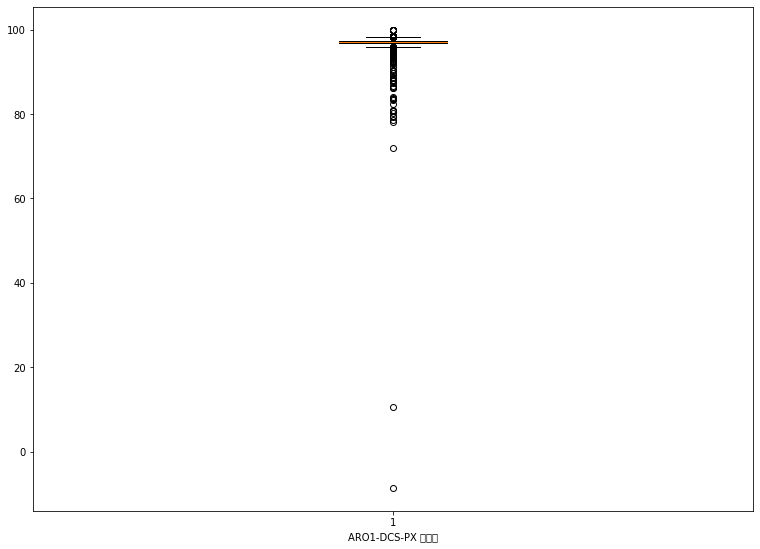

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xlabel("ARO1-DCS-PX 回收率")
bp = ax.boxplot(df_2["ARO1-DCS-PX 回收率"].dropna().values)
# bp = ax.boxplot([df_2["ARO1-DCS-AC_L2_A"].dropna().values, df_2["ARO1-DCS-AC_L3_A"].dropna().values, df_2["ARO1-DCS-AC_L4_A"].dropna().values,
#           df_2["ARO1-DCS-AC_A_FA"].dropna().values, df_2["ARO1-DCS-AC_HF"].dropna().values, df_2["ARO1-LIMS-s704-744-p-Xylene"].dropna().values,
#           df_2["ARO1-LIMS-s912-744-p-Xylene"].dropna().values, df_2["ARO1-LIMS-s912-744-m-Xylene"].dropna().values, df_2["ARO1-LIMS-s917-744-p-Xylene"].dropna().values,
#           df_2["ARO1-LIMS-s916-744-p-Xylene"].dropna().values, df_2["ARO1-DCS-PX 回收率"].dropna().values])
plt.show()

# plt.show()

In [15]:
# remove outliner
import numpy as np
for j in col:
  mean = df_2[j].mean()
  std = df_2[j].std()
  outliner = []
  for i in range(len(df_2[j])):
    if (df_2.loc[i,j] > (mean - std*3) and df_2.loc[i,j] < (mean + std*3)):
      pass
    else:
      outliner = outliner + [i]
  print(j , mean, std, (mean - std*3), (mean + std*3))
  df_2.loc[outliner, j] = np.nan

ARO1-DCS-FIC_98302_1 229.0349034101062 52.81671960614921 70.58474459165856 387.48506222855383
ARO1-DCS-FIC_98401_1 238.33618985552488 54.51488128935302 74.79154598746581 401.8808337235839
ARO1-DCS-AC_CTIME 31.885838501395916 3.9201443744124567 20.125405378158547 43.646271624633286
ARO1-DCS-AC_STIME 79.56027222491427 9.75567006165204 50.29326203995815 108.82728240987039
ARO1-LIMS-S704-BR_INDEX 2.2205701473290724 1.421962008035729 -2.045315876778114 6.486456171436259
ARO1-LIMS-s704-744-C9 85.86486917478473 68.3618662675151 -119.22072962776056 290.95046797733005
ARO1-LIMS-s704-744-C10+ 0.9780539693203448 61.078336880797636 -182.25695667307258 184.21306461171326
ARO1-LIMS-S704-WATER 36.93001020914389 18.97606894127738 -19.998196614688254 93.85821703297603
ARO1-LIMS-S704-TS 0.024448549714264363 0.04874386182828152 -0.1217830357705802 0.1706801351991089
ARO1-DCS-PDI_91102 2.758738875436874 0.5761245350100801 1.0303652704066335 4.487112480467114
ARO1-DCS-PDI_91202 2.7070884360326652 0.5721172

In [16]:
df_3 = df_2[x_col].dropna(axis="index").join(df_2.loc[df_2[x_col].dropna(axis="index").index.tolist(), y_col])
df_3

ARO1-DCS-FIC_98302_1  ...  ARO1-DCS-PX 回收率
7                224.998505  ...              NaN
15               224.998505  ...              NaN
23               224.998505  ...              NaN
31               224.998505  ...              NaN
39               224.998505  ...              NaN
...                     ...  ...              ...
71415            254.993500  ...        96.334282
71423            254.993500  ...        96.361374
71431            254.993500  ...        96.388466
71439            254.993500  ...        96.411087
71447            254.993500  ...        96.409782

[8115 rows x 17 columns]

In [17]:
df_3.describe()

ARO1-DCS-FIC_98302_1  ...  ARO1-DCS-PX 回收率
count           8115.000000  ...      2573.000000
mean             240.950325  ...        96.928795
std               16.833887  ...         0.762297
min               72.901761  ...        88.129730
25%              224.998505  ...        96.720848
50%              252.006195  ...        97.023766
75%              254.007401  ...        97.284325
max              255.000674  ...       100.000000

[8 rows x 17 columns]

In [19]:
df_3_describe = df_3[col].describe()
df_3_describe.iloc[:,9:14]

ARO1-DCS-PDI_91102  ...  ARO1-LIMS-s912-744-m-Xylene
count         8105.000000  ...                  8115.000000
mean             2.872866  ...                  1158.835071
std              0.297948  ...                   318.602280
min              1.867774  ...                     0.139300
25%              2.575552  ...                   826.000000
50%              3.022735  ...                  1237.000000
75%              3.121486  ...                  1437.000000
max              3.518852  ...                  1994.000000

[8 rows x 5 columns]

<font size = 5>Analysis</font>
*   ARO2-LIMS-S708@PX
*   ARO2-LIMS-s922@PX
*   ARO2-LIMS-s922@MX


corr

In [20]:
df_3_corr = df_3[col].corr()[y_col]
df_3_corr.iloc[:,:5]

ARO1-DCS-PDI_91102  ...  ARO1-LIMS-s912-744-m-Xylene
ARO1-DCS-FIC_98302_1                   0.974378  ...                     0.706546
ARO1-DCS-FIC_98401_1                   0.960690  ...                     0.784370
ARO1-DCS-AC_CTIME                     -0.952467  ...                    -0.721949
ARO1-DCS-AC_STIME                     -0.952468  ...                    -0.720004
ARO1-LIMS-S704-BR_INDEX               -0.239623  ...                    -0.214442
ARO1-LIMS-s704-744-C9                  0.236158  ...                     0.300553
ARO1-LIMS-s704-744-C10+               -0.046686  ...                    -0.030659
ARO1-LIMS-S704-WATER                   0.015393  ...                    -0.102828
ARO1-LIMS-S704-TS                     -0.104021  ...                    -0.108312
ARO1-DCS-PDI_91102                     1.000000  ...                     0.729122
ARO1-DCS-PDI_91202                     0.940212  ...                     0.780947
ARO1-LIMS-s704-744-p-Xylene            0.052738  ...                     0.069175
ARO1-LIMS-s912-744-p-Xylene            0.003390  ...                    -0.008125
ARO1-LIMS-s912-744-m-Xylene            0.729122  ...                     1.000000
ARO1-LIMS-s917-744-p-Xylene           -0.108602  ...                    -0.155745
ARO1-LIMS-s916-744-p-Xylene            0.222204  ...                     0.257867
ARO1-DCS-PX 回收率                        0.195883  ...                    -0.033411

[17 rows x 5 columns]

xgboost

['ARO1-DCS-FIC_98302_1', 'ARO1-DCS-FIC_98401_1', 'ARO1-DCS-AC_STIME', 'ARO1-DCS-AC_CTIME', 'ARO1-LIMS-S704-BR_INDEX', 'ARO1-LIMS-s704-744-C9', 'ARO1-LIMS-S704-TS', 'ARO1-LIMS-s704-744-C10+', 'ARO1-LIMS-S704-WATER'] : ARO1-DCS-PDI_91102
[00:54:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


'ARO1-DCS-PDI_91102 驗證分數:'

0.9731929004325341

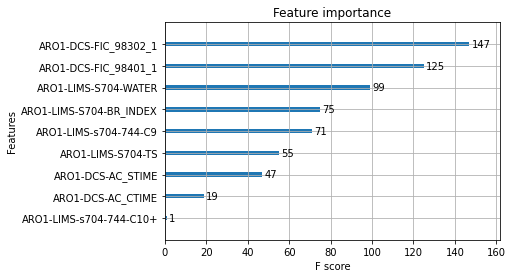

['ARO1-DCS-FIC_98401_1', 'ARO1-DCS-FIC_98302_1', 'ARO1-DCS-AC_CTIME', 'ARO1-DCS-AC_STIME', 'ARO1-LIMS-s704-744-C9', 'ARO1-LIMS-S704-BR_INDEX', 'ARO1-LIMS-S704-TS', 'ARO1-LIMS-s704-744-C10+', 'ARO1-LIMS-S704-WATER'] : ARO1-DCS-PDI_91202
[00:54:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


'ARO1-DCS-PDI_91202 驗證分數:'

0.9736438617365759

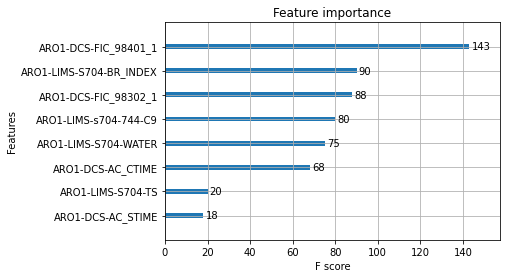

['ARO1-LIMS-s704-744-C9', 'ARO1-LIMS-S704-BR_INDEX', 'ARO1-LIMS-S704-TS', 'ARO1-LIMS-s704-744-C10+', 'ARO1-DCS-AC_STIME', 'ARO1-DCS-AC_CTIME', 'ARO1-LIMS-S704-WATER', 'ARO1-DCS-FIC_98401_1', 'ARO1-DCS-FIC_98302_1'] : ARO1-LIMS-s704-744-p-Xylene
[00:54:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


'ARO1-LIMS-s704-744-p-Xylene 驗證分數:'

0.28348159384227845

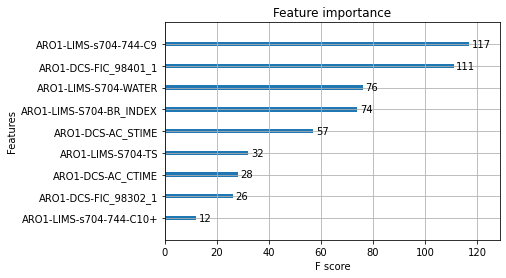

['ARO1-LIMS-s704-744-C9', 'ARO1-LIMS-S704-WATER', 'ARO1-LIMS-S704-BR_INDEX', 'ARO1-LIMS-S704-TS', 'ARO1-DCS-FIC_98302_1', 'ARO1-DCS-AC_CTIME', 'ARO1-DCS-AC_STIME', 'ARO1-DCS-FIC_98401_1', 'ARO1-LIMS-s704-744-C10+'] : ARO1-LIMS-s912-744-p-Xylene
[00:54:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


'ARO1-LIMS-s912-744-p-Xylene 驗證分數:'

-0.002372812874781083

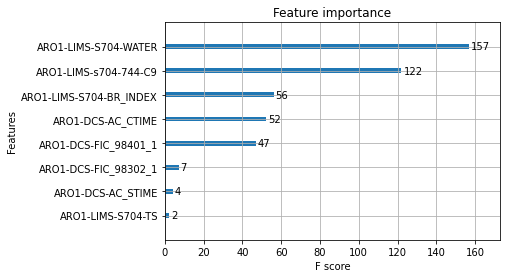

['ARO1-DCS-FIC_98401_1', 'ARO1-DCS-AC_CTIME', 'ARO1-DCS-AC_STIME', 'ARO1-DCS-FIC_98302_1', 'ARO1-LIMS-s704-744-C9', 'ARO1-LIMS-S704-BR_INDEX', 'ARO1-LIMS-S704-TS', 'ARO1-LIMS-S704-WATER', 'ARO1-LIMS-s704-744-C10+'] : ARO1-LIMS-s912-744-m-Xylene
[00:54:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


'ARO1-LIMS-s912-744-m-Xylene 驗證分數:'

0.8623155961413562

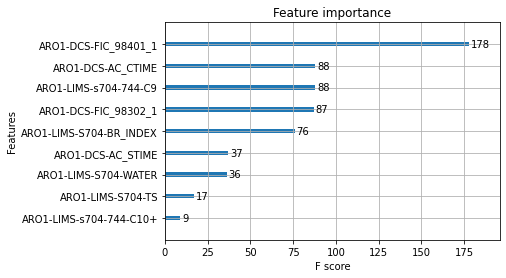

In [22]:
from sklearn.linear_model import LinearRegression
import xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from xgboost import plot_importance
import matplotlib.pyplot as plt
import seaborn as sb

for i in y_col[:5]:
  y_label = i
  features = df_3_corr.abs().loc[x_col, y_label].sort_values(ascending=False).index.tolist()
  print(features,':',y_label)
  # for i in df_mean[x_col].columns:
  #   df_mean[i] = pd.to_numeric(df_mean[i],errors='coerce') 
  df_3_xgbr = df_3[features+[y_label]].dropna(axis=0)


  X = df_3_xgbr[features]
  y = df_3_xgbr[y_label]

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  model = XGBRegressor()
  model.fit(X_train,y_train)
  display(f'{y_label} 驗證分數:',model.score(X_test,y_test))
  plot_importance(model)
  plt.show()

<font size = 5>Analysis</font>
*   ARO2-LIMS-S907@PX
*   ARO2-LIMS-S905@PX
*   ARO2-DCS-PX@Recovery

corr

In [23]:
df_3_1_24_corr = df_3[col].corr()[y_col]
df_3_1_24_corr.iloc[:,5:]

ARO1-LIMS-s917-744-p-Xylene  ...  ARO1-DCS-PX 回收率
ARO1-DCS-FIC_98302_1                           -0.105534  ...         0.063733
ARO1-DCS-FIC_98401_1                           -0.130432  ...         0.100030
ARO1-DCS-AC_CTIME                               0.119141  ...        -0.061627
ARO1-DCS-AC_STIME                               0.118408  ...        -0.062678
ARO1-LIMS-S704-BR_INDEX                        -0.001073  ...         0.074443
ARO1-LIMS-s704-744-C9                          -0.123422  ...         0.057764
ARO1-LIMS-s704-744-C10+                         0.013094  ...        -0.000103
ARO1-LIMS-S704-WATER                           -0.026301  ...        -0.076285
ARO1-LIMS-S704-TS                               0.026483  ...        -0.264025
ARO1-DCS-PDI_91102                             -0.108602  ...         0.195883
ARO1-DCS-PDI_91202                             -0.126018  ...         0.106269
ARO1-LIMS-s704-744-p-Xylene                     0.091372  ...        -0.153934
ARO1-LIMS-s912-744-p-Xylene                     0.080398  ...        -0.444769
ARO1-LIMS-s912-744-m-Xylene                    -0.155745  ...        -0.033411
ARO1-LIMS-s917-744-p-Xylene                     1.000000  ...        -0.000079
ARO1-LIMS-s916-744-p-Xylene                    -0.074109  ...        -0.429962
ARO1-DCS-PX 回收率                                -0.000079  ...         1.000000

[17 rows x 3 columns]

In [24]:
df_3_1_24_describe = df_3[col].describe()
df_3_1_24_describe.iloc[:,14:]

ARO1-LIMS-s917-744-p-Xylene  ...  ARO1-DCS-PX 回收率
count                  2634.000000  ...      2573.000000
mean                     39.002206  ...        96.928795
std                       5.939509  ...         0.762297
min                      16.617201  ...        88.129730
25%                      36.624100  ...        96.720848
50%                      39.612801  ...        97.023766
75%                      43.072498  ...        97.284325
max                      50.292000  ...       100.000000

[8 rows x 3 columns]

xgboost

['ARO1-DCS-FIC_98401_1', 'ARO1-LIMS-s704-744-C9', 'ARO1-DCS-AC_CTIME', 'ARO1-DCS-AC_STIME', 'ARO1-DCS-FIC_98302_1', 'ARO1-LIMS-S704-TS', 'ARO1-LIMS-S704-WATER', 'ARO1-LIMS-s704-744-C10+', 'ARO1-LIMS-S704-BR_INDEX'] : ARO1-LIMS-s917-744-p-Xylene
[00:56:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


'ARO1-LIMS-s917-744-p-Xylene 驗證分數:'

0.023636104923293377

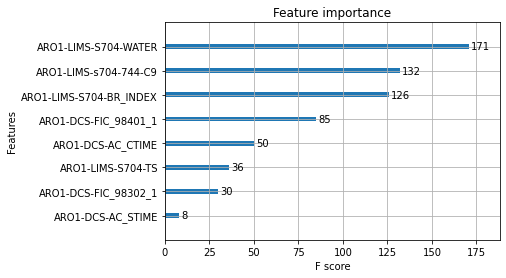

['ARO1-DCS-FIC_98401_1', 'ARO1-DCS-FIC_98302_1', 'ARO1-DCS-AC_CTIME', 'ARO1-DCS-AC_STIME', 'ARO1-LIMS-S704-BR_INDEX', 'ARO1-LIMS-S704-TS', 'ARO1-LIMS-s704-744-C9', 'ARO1-LIMS-s704-744-C10+', 'ARO1-LIMS-S704-WATER'] : ARO1-LIMS-s916-744-p-Xylene
[00:56:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


'ARO1-LIMS-s916-744-p-Xylene 驗證分數:'

0.2767014759080775

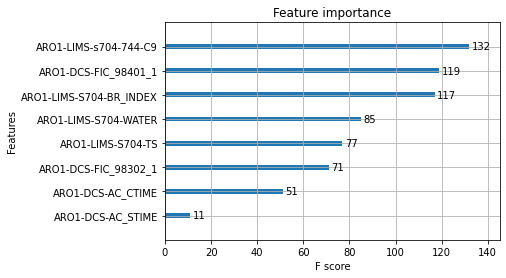

['ARO1-LIMS-S704-TS', 'ARO1-DCS-FIC_98401_1', 'ARO1-LIMS-S704-WATER', 'ARO1-LIMS-S704-BR_INDEX', 'ARO1-DCS-FIC_98302_1', 'ARO1-DCS-AC_STIME', 'ARO1-DCS-AC_CTIME', 'ARO1-LIMS-s704-744-C9', 'ARO1-LIMS-s704-744-C10+'] : ARO1-DCS-PX 回收率
[00:56:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


'ARO1-DCS-PX 回收率 驗證分數:'

0.5496566838966218

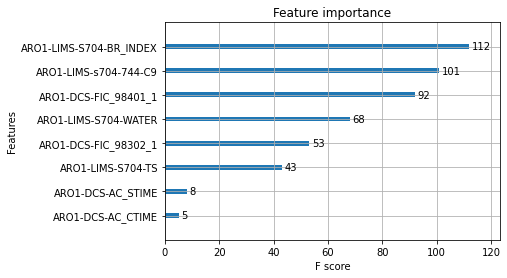

In [25]:
for i in y_col[5:]:
  y_label = i
  features = df_3_1_24_corr.abs().loc[x_col, y_label].sort_values(ascending=False).index.tolist()
  print(features,':',y_label)
  # for i in df_mean[x_col].columns:
  #   df_mean[i] = pd.to_numeric(df_mean[i],errors='coerce') 
  df_3_1_24_xgbr = df_3[features+[y_label]].dropna(axis=0)


  X = df_3_1_24_xgbr[features]
  y = df_3_1_24_xgbr[y_label]

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  model = XGBRegressor()
  model.fit(X_train,y_train)
  display(f'{y_label} 驗證分數:',model.score(X_test,y_test))
  plot_importance(model)
  plt.show()